In [1]:
#|default_exp app

Bear classifier

In [2]:
#|export
from fastbook import *
from fastai.vision.widgets import *
import gradio as gr

def bear_types(x):return x[0].isupper()

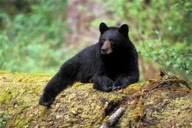

In [3]:
im = PILImage.create('black.jpg')
im.thumbnail((192,192))
im

In [4]:
#|export
learn = load_learner('model.pkl')

In [5]:
learn.predict(im)

('black', tensor(0), tensor([9.9999e-01, 8.8467e-06, 1.1670e-06]))

In [6]:
learn.dls.vocab

['black', 'grizzly', 'teddy']

In [7]:
#|export
categories = ('black', 'grizzly', 'teddy')

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories,map(float,probs)))

In [8]:
classify_image(im)

{'black': 0.9999899864196777,
 'grizzly': 8.846742275636643e-06,
 'teddy': 1.1670344974845648e-06}

In [9]:
#|export
image = gr.Image()
label = gr.Label()
examples = ['black.jpg', 'grizzly.jpg', 'teddy.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [10]:
m = learn.model

Export

In [8]:
import nbdev
notebook_name = "app.ipynb"
export_destination = "." # the root directory
nbdev.export.nb_export(notebook_name, export_destination) 